# Tensorflow LSTM

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

3.10.0


In [3]:
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

### Step 1. Loading dataset

In [4]:
forex_data = pd.read_excel('../0.Data/forex.xlsx')
forex_data.head()

,observation_date,DEXBZUS,DEXUSEU,DEXUSAL,DEXSZUS,DEXUSUK
0,2015-01-01,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,2.6967,1.2015,0.7379,1.2938,1.7404
2,2015-01-05,2.7284,1.1918,0.7465,1.2801,1.7588
3,2015-01-06,2.7013,1.1936,0.7482,1.2770,1.7566
4,2015-01-07,2.7000,1.1820,0.7528,1.2695,1.7697


In [5]:
forex_data.tail()

,observation_date,DEXBZUS,DEXUSEU,DEXUSAL,DEXSZUS,DEXUSUK
957,2018-09-03,NaN,NaN,0.8323,1.0628,1.6269
958,2018-09-04,4.1560,1.1566,0.8406,1.0598,1.6354
959,2018-09-05,4.1589,1.1620,0.8485,1.0613,1.6378
960,2018-09-06,4.1462,1.1624,NaN,NaN,NaN
961,2018-09-07,4.0594,1.1572,0.8636,1.0463,1.6512


In [6]:
forex_data.observation_date = pd.to_datetime(forex_data.observation_date)

In [7]:
forex_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 6 columns):
observation_date    962 non-null datetime64[ns]
DEXBZUS             925 non-null float64
DEXUSEU             925 non-null float64
DEXUSAL             931 non-null float64
DEXSZUS             931 non-null float64
DEXUSUK             931 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 45.2 KB


In [8]:
forex_data.isnull().sum()

observation_date     0
DEXBZUS             37
DEXUSEU             37
DEXUSAL             31
DEXSZUS             31
DEXUSUK             31
dtype: int64

In [9]:
forex_data1=forex_data.dropna(subset=['DEXBZUS', 'DEXUSEU','DEXUSAL','DEXSZUS','DEXUSUK'])
forex_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898 entries, 1 to 961
Data columns (total 6 columns):
observation_date    898 non-null datetime64[ns]
DEXBZUS             898 non-null float64
DEXUSEU             898 non-null float64
DEXUSAL             898 non-null float64
DEXSZUS             898 non-null float64
DEXUSUK             898 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 49.1 KB


In [10]:
import missingno as msno

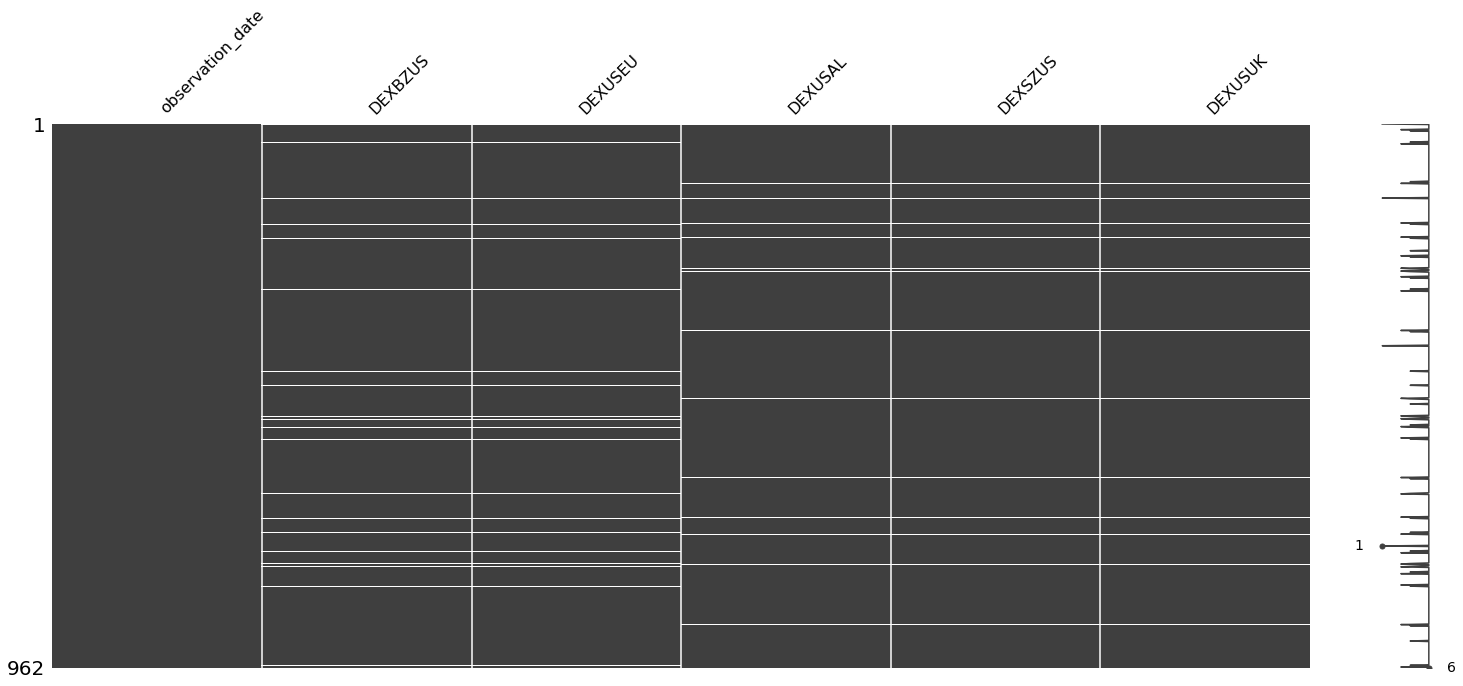

In [11]:
msno.matrix(forex_data)

observation_date    0
DEXBZUS             0
DEXUSEU             0
DEXUSAL             0
DEXSZUS             0
DEXUSUK             0
dtype: int64


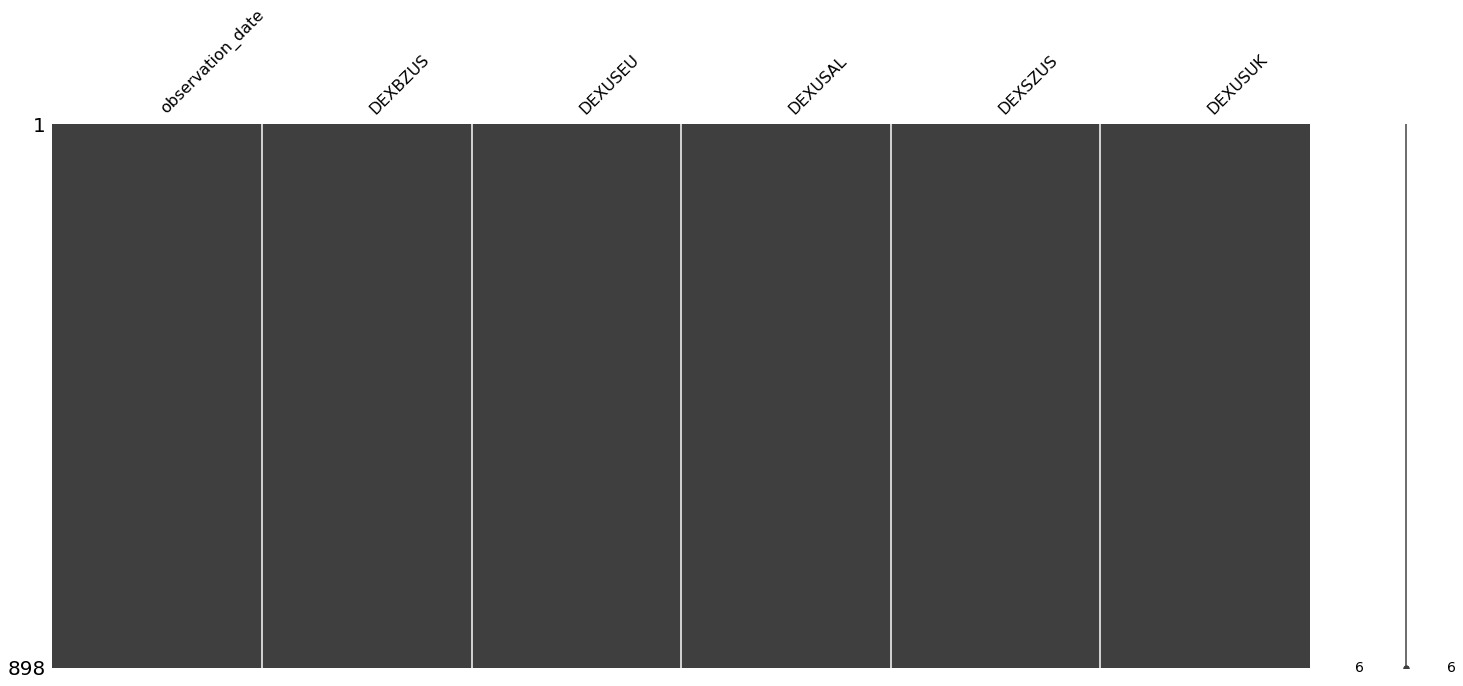

In [12]:
forex_data.dropna(inplace = True)
print(forex_data.isnull().sum())
msno.matrix(forex_data)

In [13]:
forex_data.head()

,observation_date,DEXBZUS,DEXUSEU,DEXUSAL,DEXSZUS,DEXUSUK
1,2015-01-02,2.6967,1.2015,0.7379,1.2938,1.7404
2,2015-01-05,2.7284,1.1918,0.7465,1.2801,1.7588
3,2015-01-06,2.7013,1.1936,0.7482,1.2770,1.7566
4,2015-01-07,2.7000,1.1820,0.7528,1.2695,1.7697
5,2015-01-08,2.6635,1.1811,0.7517,1.2794,1.7645


In [14]:
# Sort DataFrame by date 
forex_data = forex_data.sort_values('observation_date')

print("No. of rows: {}".format(forex_data.shape[0]))
print("No. of colums: {}".format(forex_data.shape[1]))
print("----------------")
print(forex_data.head())
print(forex_data.tail())

No. of rows: 898
No. of colums: 6
----------------
  observation_date  DEXBZUS  DEXUSEU  DEXUSAL  DEXSZUS  DEXUSUK
1       2015-01-02   2.6967   1.2015   0.7379   1.2938   1.7404
2       2015-01-05   2.7284   1.1918   0.7465   1.2801   1.7588
3       2015-01-06   2.7013   1.1936   0.7482   1.2770   1.7566
4       2015-01-07   2.7000   1.1820   0.7528   1.2695   1.7697
5       2015-01-08   2.6635   1.1811   0.7517   1.2794   1.7645
    observation_date  DEXBZUS  DEXUSEU  DEXUSAL  DEXSZUS  DEXUSUK
955       2018-08-30   4.2016   1.1646   0.8439   1.0569   1.6314
956       2018-08-31   4.1280   1.1596   0.8306   1.0653   1.6168
958       2018-09-04   4.1560   1.1566   0.8406   1.0598   1.6354
959       2018-09-05   4.1589   1.1620   0.8485   1.0613   1.6378
961       2018-09-07   4.0594   1.1572   0.8636   1.0463   1.6512


In [15]:
forex_data.shape

(898, 6)

In [16]:
forex_data.head()

,observation_date,DEXBZUS,DEXUSEU,DEXUSAL,DEXSZUS,DEXUSUK
1,2015-01-02,2.6967,1.2015,0.7379,1.2938,1.7404
2,2015-01-05,2.7284,1.1918,0.7465,1.2801,1.7588
3,2015-01-06,2.7013,1.1936,0.7482,1.2770,1.7566
4,2015-01-07,2.7000,1.1820,0.7528,1.2695,1.7697
5,2015-01-08,2.6635,1.1811,0.7517,1.2794,1.7645


In [17]:
forex_data.tail()

,observation_date,DEXBZUS,DEXUSEU,DEXUSAL,DEXSZUS,DEXUSUK
955,2018-08-30,4.2016,1.1646,0.8439,1.0569,1.6314
956,2018-08-31,4.1280,1.1596,0.8306,1.0653,1.6168
958,2018-09-04,4.1560,1.1566,0.8406,1.0598,1.6354
959,2018-09-05,4.1589,1.1620,0.8485,1.0613,1.6378
961,2018-09-07,4.0594,1.1572,0.8636,1.0463,1.6512


In [18]:
forex_data.columns

Index(['observation_date', 'DEXBZUS', 'DEXUSEU', 'DEXUSAL', 'DEXSZUS',
       'DEXUSUK'],
      dtype='object')

In [19]:
# forex_data.iplot(kind='scatter',x='observation_date', y='DEXUSUK' ,mode='markers',size=10)
forex_data[['DEXUSUK','DEXBZUS', 'DEXUSEU', 'DEXUSAL', 'DEXSZUS']].iplot(kind='spread')


### Dropping DEXBZUS

In [20]:
forex_data.drop('DEXBZUS', axis = 1, inplace=True )
forex_data.head()

,observation_date,DEXUSEU,DEXUSAL,DEXSZUS,DEXUSUK
1,2015-01-02,1.2015,0.7379,1.2938,1.7404
2,2015-01-05,1.1918,0.7465,1.2801,1.7588
3,2015-01-06,1.1936,0.7482,1.2770,1.7566
4,2015-01-07,1.1820,0.7528,1.2695,1.7697
5,2015-01-08,1.1811,0.7517,1.2794,1.7645


In [21]:
forex_data[['DEXUSUK','DEXUSEU', 'DEXUSAL', 'DEXSZUS']].iplot(kind='spread')

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

In [23]:
forex_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898 entries, 1 to 961
Data columns (total 5 columns):
observation_date    898 non-null datetime64[ns]
DEXUSEU             898 non-null float64
DEXUSAL             898 non-null float64
DEXSZUS             898 non-null float64
DEXUSUK             898 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 42.1 KB


Text(0.5, 1.0, 'Forex Currency')

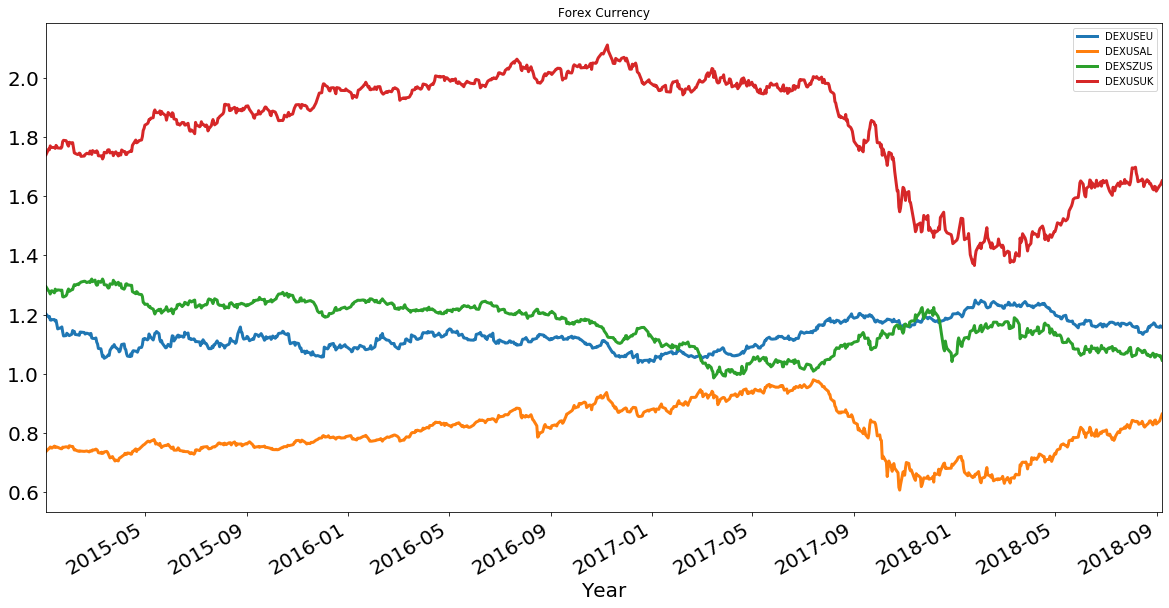

In [24]:
#forex_data.plot(figsize=(15,8), linewidth=3)
#plt.show()
forex_data.plot( x = 'observation_date', y = ['DEXUSEU', 'DEXUSAL', 'DEXSZUS','DEXUSUK'], figsize=(20,10), linewidth=3, fontsize=20)
plt.xlabel('Year', fontsize=20);
plt.title('Forex Currency')

In [26]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler


In [27]:
forex_data = pd.read_excel('../0.Data/forex.xlsx')

In [28]:
forex_data.isnull().sum()

observation_date     0
DEXBZUS             37
DEXUSEU             37
DEXUSAL             31
DEXSZUS             31
DEXUSUK             31
dtype: int64

In [29]:
forex_data.dropna(axis=0, inplace=True)
forex_data.isnull().sum()

observation_date    0
DEXBZUS             0
DEXUSEU             0
DEXUSAL             0
DEXSZUS             0
DEXUSUK             0
dtype: int64

In [30]:
forex_data.head()

,observation_date,DEXBZUS,DEXUSEU,DEXUSAL,DEXSZUS,DEXUSUK
1,2015-01-02,2.6967,1.2015,0.7379,1.2938,1.7404
2,2015-01-05,2.7284,1.1918,0.7465,1.2801,1.7588
3,2015-01-06,2.7013,1.1936,0.7482,1.2770,1.7566
4,2015-01-07,2.7000,1.1820,0.7528,1.2695,1.7697
5,2015-01-08,2.6635,1.1811,0.7517,1.2794,1.7645


Choosing only column that we are going to use in the prediction process.

In [31]:
forex_data.head()

,observation_date,DEXBZUS,DEXUSEU,DEXUSAL,DEXSZUS,DEXUSUK
1,2015-01-02,2.6967,1.2015,0.7379,1.2938,1.7404
2,2015-01-05,2.7284,1.1918,0.7465,1.2801,1.7588
3,2015-01-06,2.7013,1.1936,0.7482,1.2770,1.7566
4,2015-01-07,2.7000,1.1820,0.7528,1.2695,1.7697
5,2015-01-08,2.6635,1.1811,0.7517,1.2794,1.7645


In [32]:
data_to_use = np.asanyarray(forex_data['DEXUSUK'])

In [33]:
print('Total number of days in dataset: {}'.format(len(data_to_use)))

Total number of days in dataset: 898


In [34]:
forex_data.head()

,observation_date,DEXBZUS,DEXUSEU,DEXUSAL,DEXSZUS,DEXUSUK
1,2015-01-02,2.6967,1.2015,0.7379,1.2938,1.7404
2,2015-01-05,2.7284,1.1918,0.7465,1.2801,1.7588
3,2015-01-06,2.7013,1.1936,0.7482,1.2770,1.7566
4,2015-01-07,2.7000,1.1820,0.7528,1.2695,1.7697
5,2015-01-08,2.6635,1.1811,0.7517,1.2794,1.7645


In [35]:
forex_data.tail()

,observation_date,DEXBZUS,DEXUSEU,DEXUSAL,DEXSZUS,DEXUSUK
955,2018-08-30,4.2016,1.1646,0.8439,1.0569,1.6314
956,2018-08-31,4.1280,1.1596,0.8306,1.0653,1.6168
958,2018-09-04,4.1560,1.1566,0.8406,1.0598,1.6354
959,2018-09-05,4.1589,1.1620,0.8485,1.0613,1.6378
961,2018-09-07,4.0594,1.1572,0.8636,1.0463,1.6512


### Step 2. Data preprocessing 

#### Step 2.1 Scaling data

In [36]:
scaler = StandardScaler()

In [37]:
scaled_data = scaler.fit_transform(data_to_use.reshape(-1, 1))

In [38]:
len(scaled_data)

898

In [39]:
import pandas as pd

In [67]:
def window_data(data, window_size):
    
    X = []
    y = []
    
    i = 0
    while (i + window_size) <= len(data) - 1:
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
        
        i += 1
    #assert len(X) ==  len(y)
    return X, y


#### Step 2.2 Windowing the data with window_data function

In [68]:
X, y = window_data(scaled_data, 7)

#### Step 2.3 Splitting data to training and testing parts

In [69]:
X_train  = np.array(X[:700])
y_train = np.array(y[:700])

X_test = np.array(X[700:])
y_test = np.array(y[700:])

print("Total size: {}".format(forex_data.shape))
print("X_train size: {}".format(X_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(X_test.shape))
print("y_test size: {}".format(y_test.shape))

Total size: (898, 6)
X_train size: (700, 7, 1)
y_train size: (700, 1)
X_test size: (191, 7, 1)
y_test size: (191, 1)


### Step 3. Define the network

In [70]:
#Hyperparameters used in the network
batch_size = 7 #how many windows of data we are passing at once
window_size = 7 #how big window_size is (Or How many days do we consider to predict next point in the sequence)
hidden_layer = 256 #How many units do we use in LSTM cell
clip_margin = 4 #To prevent exploding gradient, we use clipper to clip gradients below -margin or above this margin
learning_rate = 0.001 
epochs = 100

#### Step 3.1 Define palceholders

In [71]:
inputs = tf.placeholder(tf.float32, [batch_size, window_size, 1])
targets = tf.placeholder(tf.float32, [batch_size, 1])

In this notebook I am implementing LSTM cell from scratch using TensorFlow. In the next 2 cells you will find weights and implementation of the LSTM cell.

In [72]:
# LSTM weights
#Weights for the input gate
weights_input_gate = tf.Variable(tf.truncated_normal([1, hidden_layer], stddev=0.05))
weights_input_hidden = tf.Variable(tf.truncated_normal([hidden_layer, hidden_layer], stddev=0.05))
bias_input = tf.Variable(tf.zeros([hidden_layer]))

#weights for the forgot gate
weights_forget_gate = tf.Variable(tf.truncated_normal([1, hidden_layer], stddev=0.05))
weights_forget_hidden = tf.Variable(tf.truncated_normal([hidden_layer, hidden_layer], stddev=0.05))
bias_forget = tf.Variable(tf.zeros([hidden_layer]))

#weights for the output gate
weights_output_gate = tf.Variable(tf.truncated_normal([1, hidden_layer], stddev=0.05))
weights_output_hidden = tf.Variable(tf.truncated_normal([hidden_layer, hidden_layer], stddev=0.05))
bias_output = tf.Variable(tf.zeros([hidden_layer]))

#weights for the memory cell
weights_memory_cell = tf.Variable(tf.truncated_normal([1, hidden_layer], stddev=0.05))
weights_memory_cell_hidden = tf.Variable(tf.truncated_normal([hidden_layer, hidden_layer], stddev=0.05))
bias_memory_cell = tf.Variable(tf.zeros([hidden_layer]))

In [73]:
## Output layer weigts
weights_output = tf.Variable(tf.truncated_normal([hidden_layer, 1], stddev=0.05))
bias_output_layer = tf.Variable(tf.zeros([1]))

This is definition of LSTM cell. The best explanation of the LSTM you will find [here](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)


![](lstm_cell.png)

*This image is from Colah's blog*

In [74]:
def LSTM_cell(input, output, state):
    
    input_gate = tf.sigmoid(tf.matmul(input, weights_input_gate) + tf.matmul(output, weights_input_hidden) + bias_input)
    
    forget_gate = tf.sigmoid(tf.matmul(input, weights_forget_gate) + tf.matmul(output, weights_forget_hidden) + bias_forget)
    
    output_gate = tf.sigmoid(tf.matmul(input, weights_output_gate) + tf.matmul(output, weights_output_hidden) + bias_output)
    
    memory_cell = tf.tanh(tf.matmul(input, weights_memory_cell) + tf.matmul(output, weights_memory_cell_hidden) + bias_memory_cell)
    
    state = state * forget_gate + input_gate * memory_cell
    
    output = output_gate * tf.tanh(state)
    return state, output

## Time to define loop for the network

In [75]:
outputs = []
for i in range(batch_size): #Iterates through every window in the batch
    #for each batch I am creating batch_state as all zeros and output for that window which is all zeros at the beginning as well.
    batch_state = np.zeros([1, hidden_layer], dtype=np.float32) 
    batch_output = np.zeros([1, hidden_layer], dtype=np.float32)
    #for each point in the window we are feeding that into LSTM to get next output
    for ii in range(window_size):
        batch_state, batch_output = LSTM_cell(tf.reshape(inputs[i][ii], (-1, 1)), batch_state, batch_output)
    #last output is conisdered and used to get a prediction
    outputs.append(tf.matmul(batch_output, weights_output) + bias_output_layer)

In [76]:
outputs

[<tf.Tensor 'add_511:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_575:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_639:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_703:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_767:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_831:0' shape=(1, 1) dtype=float32>,
 <tf.Tensor 'add_895:0' shape=(1, 1) dtype=float32>]

#### Step 3.3 Define loss

In [77]:
losses = []

for i in range(len(outputs)):
    losses.append(tf.losses.mean_squared_error(tf.reshape(targets[i], (-1, 1)), outputs[i]))
    
loss = tf.reduce_mean(losses)

#### Step 3.4 Define optimizer with gradient clipping

In [78]:
gradients = tf.gradients(loss, tf.trainable_variables())
clipped, _ = tf.clip_by_global_norm(gradients, clip_margin)
optimizer = tf.train.AdamOptimizer(learning_rate)
trained_optimizer = optimizer.apply_gradients(zip(gradients, tf.trainable_variables()))

### Time to train the network 

In [79]:
session = tf.Session()

In [80]:
session.run(tf.global_variables_initializer())

In [81]:
for i in range(epochs):
    traind_scores = []
    ii = 0
    epoch_loss = []
    while(ii + batch_size) <= len(X_train):
        X_batch = X_train[ii:ii+batch_size]
        y_batch = y_train[ii:ii+batch_size]
        
        o, c, _ = session.run([outputs, loss, trained_optimizer], feed_dict={inputs:X_batch, targets:y_batch})
        
        epoch_loss.append(c)
        traind_scores.append(o)
        ii += batch_size
    if (i % 30) == 0:
        print('Epoch {}/{}'.format(i, epochs), ' Current loss: {}'.format(np.mean(epoch_loss)))

Epoch 0/100  Current loss: 0.06222402676939964
Epoch 30/100  Current loss: 0.012753913179039955
Epoch 60/100  Current loss: 0.004453609697520733
Epoch 90/100  Current loss: 0.004152040928602219


In [82]:
sup =[]
for i in range(0,8):
    sup.append(None)
for i in range(len(traind_scores)):
    for j in range(len(traind_scores[i])):
        sup.append(traind_scores[i][j][0])

In [83]:
tests = []

i = 0
while i+batch_size <= len(X_test):
    
    o = session.run([outputs], feed_dict={inputs:X_test[i:i+batch_size]})
    i += batch_size
    tests.append(o)

In [84]:
len(X_train) + len(X_test)

891

In [85]:
tests_new = []
for i in range(len(tests)):
    for j in range(len(tests[i][0])):
        tests_new.append(tests[i][0][j])

In [86]:
test_results = []
for i in range(0,8):
    test_results.append(None)
    
for i in range(889):
    if i >= 701:
        print("Index {} : {}".format(i,tests_new[i-701] ))
        test_results.append(tests_new[i-701])
    else:
        test_results.append(None)

Index 701 : [[-1.5923774]]
Index 702 : [[-1.6863683]]
Index 703 : [[-1.5355484]]
Index 704 : [[-1.709591]]
Index 705 : [[-1.6636419]]
Index 706 : [[-1.767269]]
Index 707 : [[-1.7751554]]
Index 708 : [[-1.8036442]]
Index 709 : [[-1.7508051]]
Index 710 : [[-1.7979772]]
Index 711 : [[-1.7583623]]
Index 712 : [[-1.7086282]]
Index 713 : [[-1.7597774]]
Index 714 : [[-1.5951883]]
Index 715 : [[-1.6162735]]
Index 716 : [[-1.5334183]]
Index 717 : [[-1.620554]]
Index 718 : [[-1.6821787]]
Index 719 : [[-1.7167513]]
Index 720 : [[-1.7904779]]
Index 721 : [[-1.7913733]]
Index 722 : [[-1.8186122]]
Index 723 : [[-1.876846]]
Index 724 : [[-1.838451]]
Index 725 : [[-1.8576858]]
Index 726 : [[-1.7985822]]
Index 727 : [[-1.6339399]]
Index 728 : [[-1.6757531]]
Index 729 : [[-1.5843377]]
Index 730 : [[-1.7155259]]
Index 731 : [[-1.7940023]]
Index 732 : [[-1.7882175]]
Index 733 : [[-1.8241724]]
Index 734 : [[-2.0043197]]
Index 735 : [[-1.9552033]]
Index 736 : [[-2.0240695]]
Index 737 : [[-2.1407542]]
Index 

In [87]:
temp = pd.DataFrame(test_results)
temp.tail()

,0
892,[[-1.0291702]]
893,[[-1.1056652]]
894,[[-1.1235856]]
895,[[-1.0914441]]
896,[[-1.116468]]


In [88]:
len(sup)

708

In [89]:
for i in range(0, 696):
    print("Index {}: {}".format(i, sup[i]))

Index 0: None
Index 1: None
Index 2: None
Index 3: None
Index 4: None
Index 5: None
Index 6: None
Index 7: None
Index 8: [-0.72651964]
Index 9: [-0.7407697]
Index 10: [-0.6856356]
Index 11: [-0.7167342]
Index 12: [-0.71877515]
Index 13: [-0.70536804]
Index 14: [-0.630146]
Index 15: [-0.4927251]
Index 16: [-0.44842732]
Index 17: [-0.45185134]
Index 18: [-0.51233304]
Index 19: [-0.5529974]
Index 20: [-0.51629096]
Index 21: [-0.52546096]
Index 22: [-0.38038132]
Index 23: [-0.4620718]
Index 24: [-0.58378834]
Index 25: [-0.6512481]
Index 26: [-0.71935296]
Index 27: [-0.7211311]
Index 28: [-0.702145]
Index 29: [-0.53190666]
Index 30: [-0.56676084]
Index 31: [-0.58535737]
Index 32: [-0.58617675]
Index 33: [-0.54915607]
Index 34: [-0.5257321]
Index 35: [-0.47595334]
Index 36: [-0.38572794]
Index 37: [-0.41479287]
Index 38: [-0.38077664]
Index 39: [-0.39706975]
Index 40: [-0.3696819]
Index 41: [-0.3565911]
Index 42: [-0.38348028]
Index 43: [-0.41326135]
Index 44: [-0.44295245]
Index 45: [-0.464

Index 603: [0.7169414]
Index 604: [0.70536673]
Index 605: [0.6432083]
Index 606: [0.6891361]
Index 607: [0.67948014]
Index 608: [0.74897134]
Index 609: [0.79963326]
Index 610: [0.7479949]
Index 611: [0.76713026]
Index 612: [0.7580085]
Index 613: [0.6557981]
Index 614: [0.64432245]
Index 615: [0.72035897]
Index 616: [0.6975073]
Index 617: [0.7458273]
Index 618: [0.77232164]
Index 619: [0.7993866]
Index 620: [0.7908553]
Index 621: [0.790963]
Index 622: [0.7789328]
Index 623: [0.76143545]
Index 624: [0.7624238]
Index 625: [0.79027975]
Index 626: [0.7180298]
Index 627: [0.72351277]
Index 628: [0.7761712]
Index 629: [0.70071656]
Index 630: [0.70649046]
Index 631: [0.7292442]
Index 632: [0.69181484]
Index 633: [0.6388181]
Index 634: [0.60592407]
Index 635: [0.5883238]
Index 636: [0.57175016]
Index 637: [0.47008917]
Index 638: [0.44512805]
Index 639: [0.39935112]
Index 640: [0.23934585]
Index 641: [0.24655886]
Index 642: [0.24074313]
Index 643: [0.23208863]
Index 644: [0.24981286]
Index 645: 

### Plotting predictions from the network

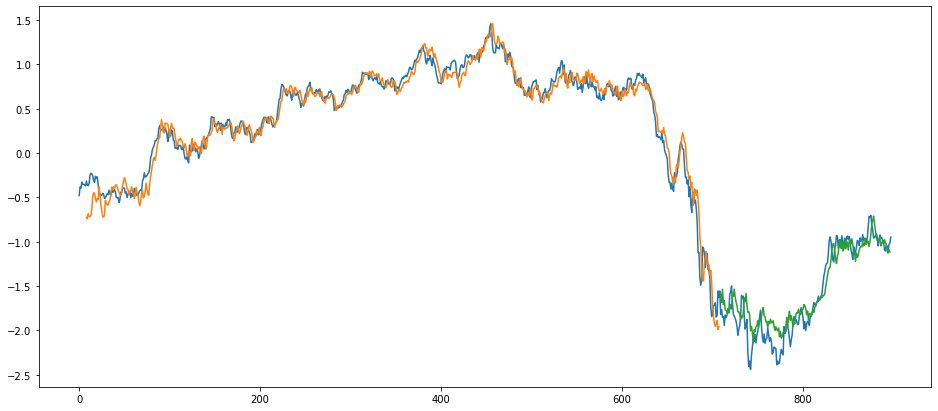

In [90]:
plt.figure(figsize=(16, 7))
plt.plot(scaled_data, label='Original data')
plt.plot(sup, label='Training data')
plt.plot(test_results, label='Testing data')
plt.show()

In [91]:
session.close()